# Power Transforms

Data transforms are intended to remove noise and improve signal. There are many transforms to choose from and each has a different mathematical intuition. The transforms discussed here are:
- Square root
- Log
- Box-Cox

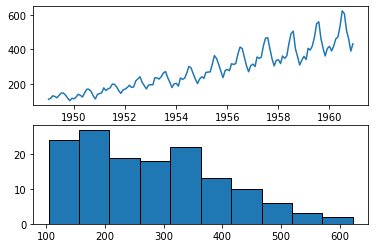

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

series = pd.read_csv('airline-passengers.csv', header=0, index_col=0,
                    parse_dates=True, squeeze=True)

plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(series)

# histogram
plt.subplot(212)
plt.hist(series, edgecolor='black')
plt.show()

This dataset is non-stationary, meaning that the mean and the variance of the observations change over time. This makes it difficult to model by both classical statistical methods, like ARIMA, and more sophisticated machine learning methods, like neural networks. This is caused by what appears to be both an increasing trend and a seasonality component.

## Square Root Transform

A time series that has a quadratic growth trend can be made linear by taking the square root.

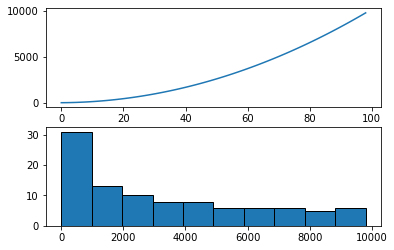

In [2]:
# a quadratic time series
series = [i**2 for i in range(1,100)]
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(series)
# histogram
plt.subplot(212)
plt.hist(series, edgecolor='black')
plt.show()

Because this example is perfectly quadratic, we would expect a square root transformation to show a straight line, and indeed it does:

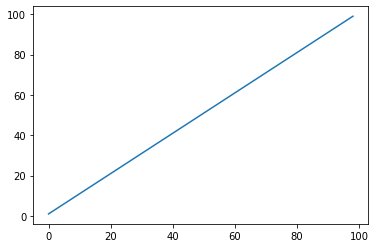

In [3]:
import numpy as np

transform = np.sqrt(series)
plt.plot(transform)
plt.show()

Its possible that the airline passengers dataset shows a quadratic growth. If this is true, then we could expect a square root transformation to reduce the growth trend to be linear and change the distribution of observations, hopefully to a Gaussian form. 

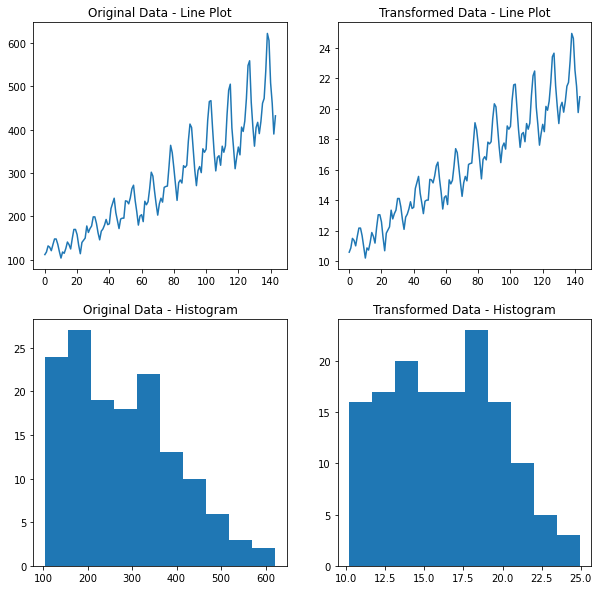

In [4]:
series = pd.read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df = pd.DataFrame(series.values)
df.columns=['passengers']
df['sqrt_passengers'] = np.sqrt(df.passengers)

fig = plt.figure(figsize=(10,10))
# line plot
ax1 = fig.add_subplot(221)
ax1.plot(df.passengers)
ax1.title.set_text('Original Data - Line Plot')

ax2 = fig.add_subplot(222)
ax2.plot(df.sqrt_passengers)
ax2.title.set_text('Transformed Data - Line Plot')

# histogram
ax3 = fig.add_subplot(223)
ax3.hist(df.passengers)
ax3.title.set_text('Original Data - Histogram')

ax4 = fig.add_subplot(224)
ax4.hist(df.sqrt_passengers)
ax4.title.set_text('Transformed Data - Histogram')

plt.tight_layout
plt.show()

We can see that some of the quadratic nature of the trend was reduced, but not eliminated. The histogram still shows a right skew, suggesting an exponential or long-tail distribution. 

## Log Transform

Time series with an exponential distribution can be made linear by taking the logarithm of the values. This is called a log transform. 

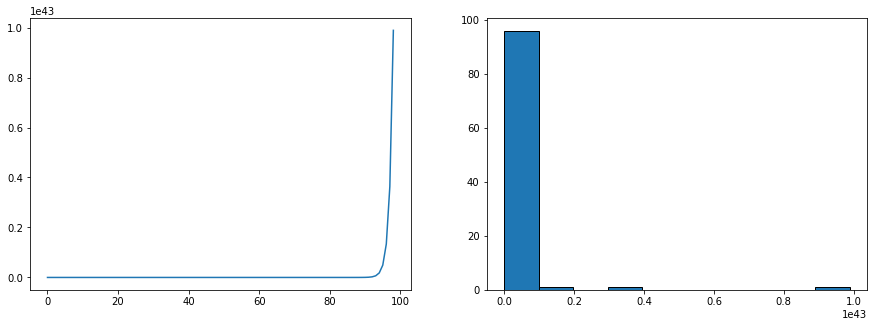

In [5]:
from math import exp

series = [exp(i) for i in range(1,100)] # raising the numbers 1 to 99 to the value e
plt.figure(figsize=(15,5))

# line plot
plt.subplot(121)
plt.plot(series)

# histogram
plt.subplot(122)
plt.hist(series, edgecolor='black')

plt.show()

We can transform this series to linear by taking the natural log of the values.

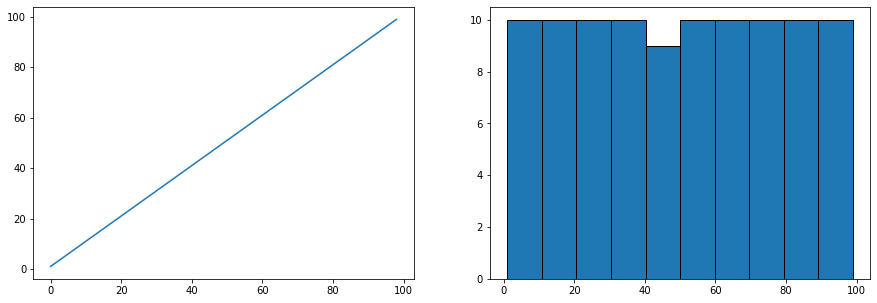

In [6]:
transform = np.log(series)
plt.figure(figsize=(15,5))

# line plot
plt.subplot(121)
plt.plot(transform)

# histogram
plt.subplot(122)
plt.hist(transform, edgecolor='black')

plt.show()

Our Airline Passengers dataset has a distribution similar to this form, but perhaps not this extreme. Let's apply this transformation to the Airline Passengers dataset:

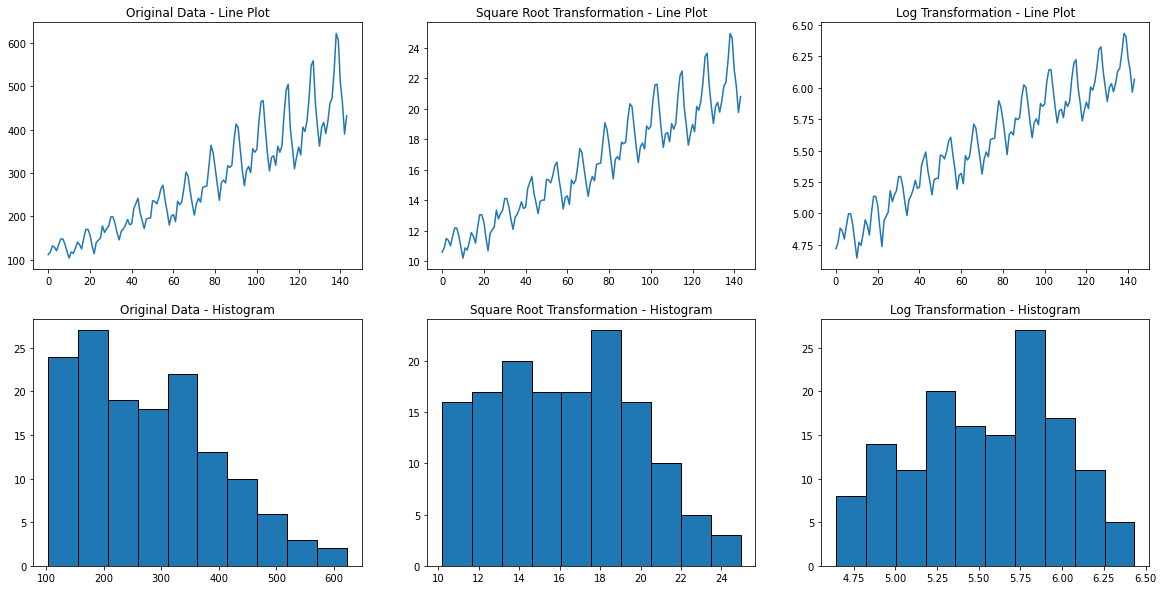

In [7]:
df['log_passengers'] = np.log(df.passengers)

fig = plt.figure(figsize=(20,10))
# line plot
ax1 = fig.add_subplot(231)
ax1.plot(df.passengers)
ax1.title.set_text('Original Data - Line Plot')

ax2 = fig.add_subplot(232)
ax2.plot(df.sqrt_passengers)
ax2.title.set_text('Square Root Transformation - Line Plot')

ax3 = fig.add_subplot(233)
ax3.plot(df.log_passengers)
ax3.title.set_text('Log Transformation - Line Plot')

# histogram
ax4 = fig.add_subplot(234)
ax4.hist(df.passengers, edgecolor='black')
ax4.title.set_text('Original Data - Histogram')

ax5 = fig.add_subplot(235)
ax5.hist(df.sqrt_passengers, edgecolor='black')
ax5.title.set_text('Square Root Transformation - Histogram')

ax6 = fig.add_subplot(236)
ax6.hist(df.log_passengers, edgecolor='black')
ax6.title.set_text('Log Transformation - Histogram')

plt.tight_layout
plt.show()

The transformed data looks more linear than our previous square root transformation. The line plot seems to have linear growth and variance. The histogram also shows a more uniform or squashed Gaussian-like distribution of observations.

Log transforms are popular with time series data as they are effective at removing exponential variance. It is important to note that this operation assumes values are positive and non-zero. If this is not the case, it is common to transform observations by adding a fixed constant. For example:

            transform = log(constant + x)
            
Where `log` is the natural logarithm, `transform` is the transformed series, `constant` is a fixed value that lifts all observations above zero, and `x` is the time series.

## Box-Cox Transform

The square root transform and log transform belong to a class of transforms called **power transforms**. The Box-Cox transform is a configurable data transform that supports both square root and log transform, as well as a suite of related transforms. 

The scipy.stats library provides an implementation of the Box-Cox transform. The `boxcox()` function takes an argument, called `lambda` that controls the type of transform to perform. Below are some common values for `lambda`:
- `lambda` = -1.0 is a reciprocal transform
- `lambda` = -0.5 is a reciprocal square root transform
- `lambda` = 0.0 is a log transform
- `lambda` = 0.5 is a square root transform
- `lambda` = 1.0 is no transform

If `lambda` is not included, then the function will find a statistically tuned value

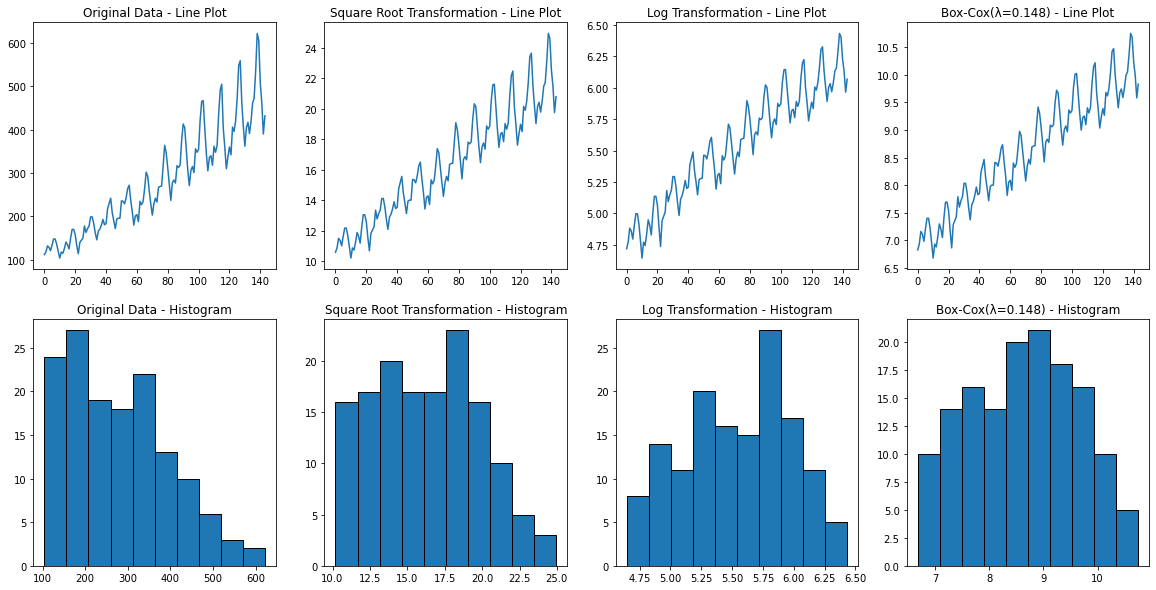

In [8]:
from scipy.stats import boxcox

df['boxcox_0'], lam = boxcox(df.passengers)

fig = plt.figure(figsize=(20,10))
# line plot
ax1 = fig.add_subplot(241)
ax1.plot(df.passengers)
ax1.title.set_text('Original Data - Line Plot')

ax2 = fig.add_subplot(242)
ax2.plot(df.sqrt_passengers)
ax2.title.set_text('Square Root Transformation - Line Plot')

ax3 = fig.add_subplot(243)
ax3.plot(df.log_passengers)
ax3.title.set_text('Log Transformation - Line Plot')

ax7 = fig.add_subplot(244)
ax7.plot(df.boxcox_0)
ax7.title.set_text(f'Box-Cox(λ={round(lam, 3)}) - Line Plot')

# histogram
ax4 = fig.add_subplot(245)
ax4.hist(df.passengers, edgecolor='black')
ax4.title.set_text('Original Data - Histogram')

ax5 = fig.add_subplot(246)
ax5.hist(df.sqrt_passengers, edgecolor='black')
ax5.title.set_text('Square Root Transformation - Histogram')

ax6 = fig.add_subplot(247)
ax6.hist(df.log_passengers, edgecolor='black')
ax6.title.set_text('Log Transformation - Histogram')

ax8 = fig.add_subplot(248)
ax8.hist(df.boxcox_0, edgecolor='black')
ax8.title.set_text(f'Box-Cox(λ={round(lam, 3)}) - Histogram')

plt.tight_layout
plt.show()

We can see that in the example above, we discovered a `lambda` value close to 0.148. This is very close to a `lambda` value of 0.0, resulting in a log transform and stronger (less than) than 0.5 for the square root transform. 

## Summary

- Use a square root transform on a quadratic trend
- Use a log transform on an exponential trend
- Use a Box-Cox transform to automatically optimize the transform for a dataset